<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
data = pd.read_csv('./train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

### Обработка данных

In [6]:
data.isnull().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'],errors='coerce')
data.isnull().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                   True
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

In [9]:
data = data.dropna()
data.isna().any()

ClientPeriod                False
MonthlySpending             False
TotalSpent                  False
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
Churn                       False
dtype: bool

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### 1) Гистограммы численных признаков

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'TotalSpent'}>, <AxesSubplot:>]],
      dtype=object)

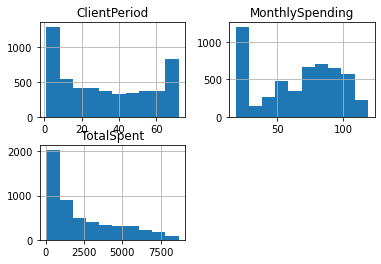

In [10]:
num_cols_df = data[num_cols]
num_cols_df.hist()

### 1) Bar диаграммы для категориальных признаков

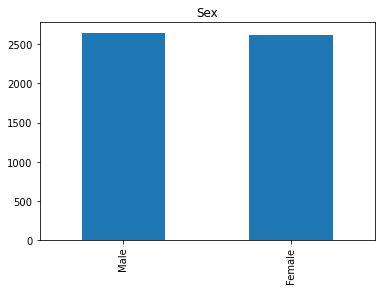

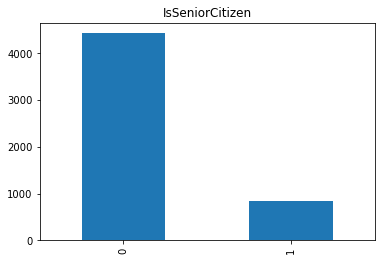

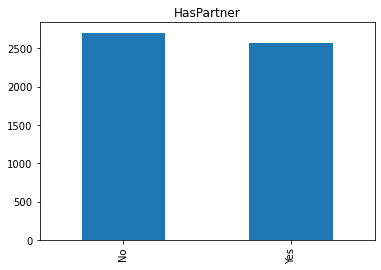

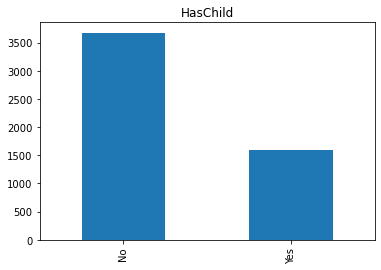

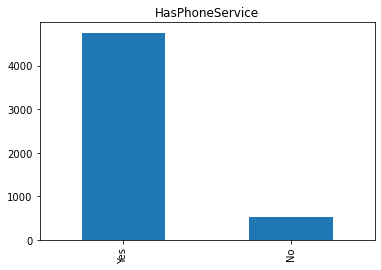

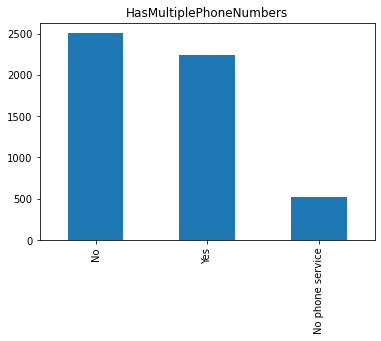

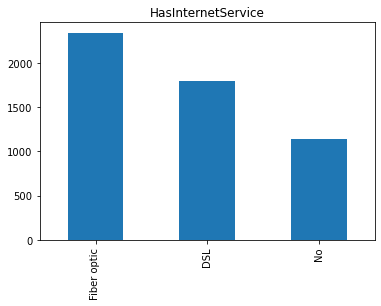

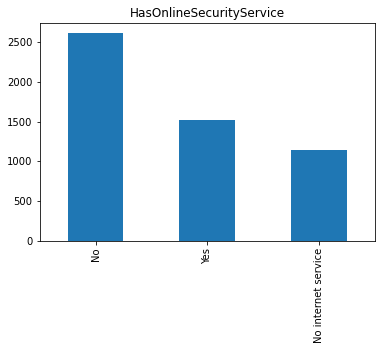

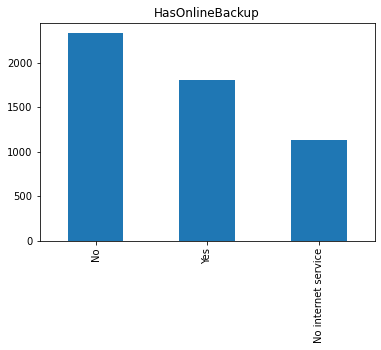

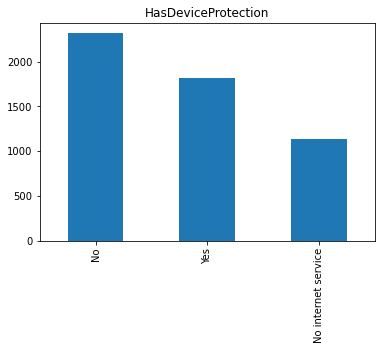

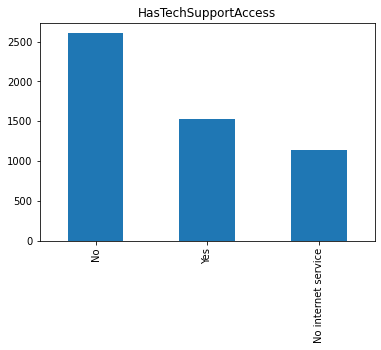

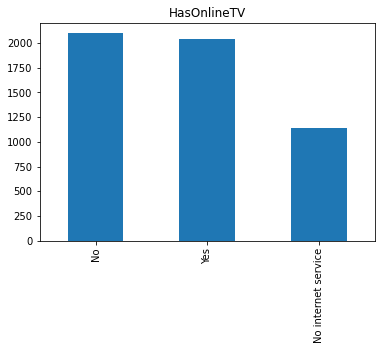

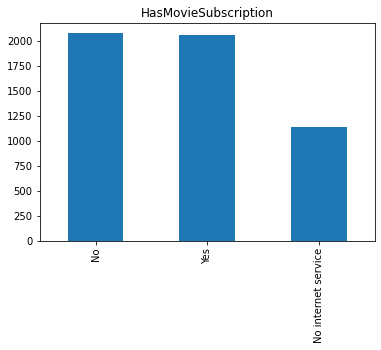

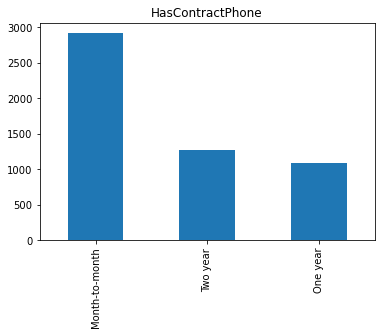

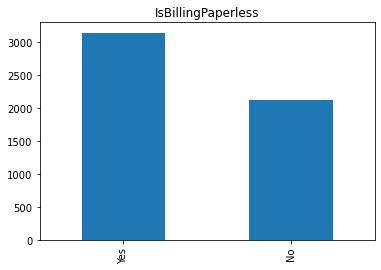

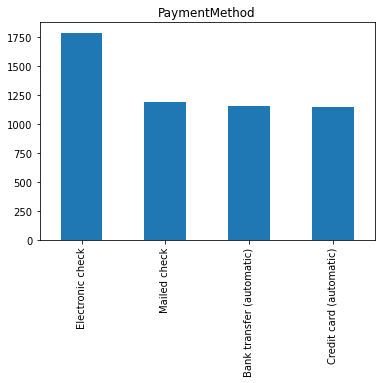

In [11]:
cat_cols_df = data[cat_cols]
for cat_column in cat_cols:
    cat_cols_df[cat_column].value_counts().plot.bar(title=cat_column)
    plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

### 2) Распределение целевой переменной

In [12]:
data[target_col].describe()

count    5273.000000
mean        0.262469
std         0.440018
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

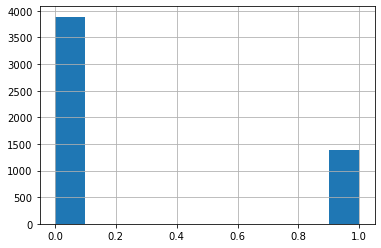

In [13]:
data[target_col].hist()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

### 1) Нормируем числовые признаки

In [15]:
standard_scaler = StandardScaler()
num_features_normalized = standard_scaler.fit_transform(num_cols_df)
num_cols_df_normalized = pd.DataFrame(num_features_normalized, index=num_cols_df.index, columns=num_cols_df.columns)
num_cols_df_normalized

,ClientPeriod,MonthlySpending,TotalSpent
0,0.919099,-1.506436,-0.557582
1,1.612060,-1.295997,-0.184763
2,-1.282072,0.362658,-0.976504
3,-0.018437,0.475334,0.122800
4,1.122911,1.666716,1.968909
...,...,...,...
5277,-1.200547,-1.145210,-0.973749
5278,0.715287,-0.679594,-0.045372
5279,-1.282072,-0.328310,-0.985693
5280,-0.140724,0.365972,-0.033560


### 1) One-hot-encoding

In [16]:
cat_cols_df_encoded = pd.get_dummies(cat_cols_df)
data_preprocessed = pd.concat([num_cols_df_normalized, cat_cols_df_encoded, data[target_col]], axis=1)

### 2) Подбор гиперпараметра C

In [17]:
lr = LogisticRegression()
parameters = { 'C': [100, 10, 1, 0.1, 0.01, 0.001] }
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')

X = data_preprocessed.iloc[:, :-1]
Y = data_preprocessed[target_col]

clf.fit(X, Y)

C:\Users\pushk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pushk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

### Результат кросс-валидации

In [18]:
clf.best_score_

0.8448181101278219

In [19]:
clf.best_params_

{'C': 100}

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

### 1) Catboost со стандартными параметрами

In [20]:
import catboost
from sklearn.metrics import roc_auc_score, roc_curve

In [21]:
cat_cols_indices = list(map(lambda column: data.columns.get_loc(column), cat_cols))

In [22]:
# CatBoost умеет работать с категориальными признаками сам
X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:,:-1].values, data[target_col].values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [26]:
default_boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols_indices, eval_metric='AUC')
default_boosting_model.fit(X_train, Y_train, silent=True)

y_train_default_predicted = default_boosting_model.predict_proba(X_train)[:, 1]
y_test_default_predicted = default_boosting_model.predict_proba(X_test)[:, 1]

0.8892021530104204 0.8397499410238264


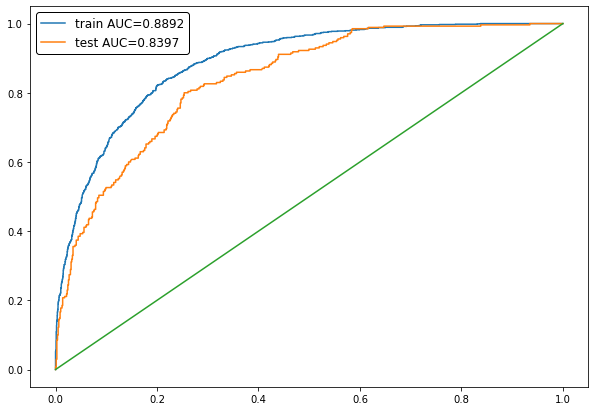

In [27]:
default_train_auc = roc_auc_score(Y_train, y_train_default_predicted)
default_test_auc = roc_auc_score(Y_test, y_test_default_predicted)
print(default_train_auc, default_test_auc)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(Y_train, y_train_default_predicted)[:2], label='train AUC={:.4f}'.format(default_train_auc))
plt.plot(*roc_curve(Y_test, y_test_default_predicted)[:2], label='test AUC={:.4f}'.format(default_test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

### 2) Поиск лучших параметров

In [24]:
grid_search_boosting_model = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols_indices,
                                             eval_metric='AUC')
cat_boost_params_from_grid_search = grid_search_boosting_model.grid_search({'iterations': np.linspace(500, 2000, 4), 'learning_rate': [0.001, 0.01, 0.03, 0.1], 'l2_leaf_reg': np.linspace(0.1, 4, 5)}, 
                           X_train, 
                           Y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8566572394
bestIteration = 499

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8566572	best: 0.8566572 (0)	total: 12.8s	remaining: 16m 54s

bestTest = 0.867051327
bestIteration = 254

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8670513	best: 0.8670513 (1)	total: 25.6s	remaining: 16m 39s

bestTest = 0.866635013
bestIteration = 177

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8666350	best: 0.8670513 (1)	total: 40s	remaining: 17m 7s

bestTest = 0.8614431301
bestIteration = 35

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8614431	best: 0.8670513 (1)	total: 51.6s	remaining: 16m 20s

b


bestTest = 0.8665214729
bestIteration = 407

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
33:	loss: 0.8665215	best: 0.8680629 (19)	total: 8m 42s	remaining: 11m 47s

bestTest = 0.8663976108
bestIteration = 145

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
34:	loss: 0.8663976	best: 0.8680629 (19)	total: 9m 4s	remaining: 11m 40s

bestTest = 0.8666281318
bestIteration = 30

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
35:	loss: 0.8666281	best: 0.8680629 (19)	total: 9m 26s	remaining: 11m 32s

bestTest = 0.8635074971
bestIteration = 972

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
36:	loss: 0.8635075	best: 0.8680629 (19)	total: 9m 45s	remai


bestTest = 0.8679390048
bestIteration = 156

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
66:	loss: 0.8679390	best: 0.8681076 (38)	total: 30m 19s	remaining: 5m 53s

bestTest = 0.8636347997
bestIteration = 67

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
67:	loss: 0.8636348	best: 0.8681076 (38)	total: 31m 26s	remaining: 5m 32s

bestTest = 0.8649147072
bestIteration = 1987

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
68:	loss: 0.8649147	best: 0.8681076 (38)	total: 32m 18s	remaining: 5m 9s

bestTest = 0.8674022694
bestIteration = 445

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
69:	loss: 0.8674023	best: 0.8681076 (38)	total: 33m 16s	rem

In [25]:
cat_boost_params_from_grid_search['params']

{'learning_rate': 0.03, 'l2_leaf_reg': 4.0, 'iterations': 1000.0}

0.9124847882618594 0.8385232366124087


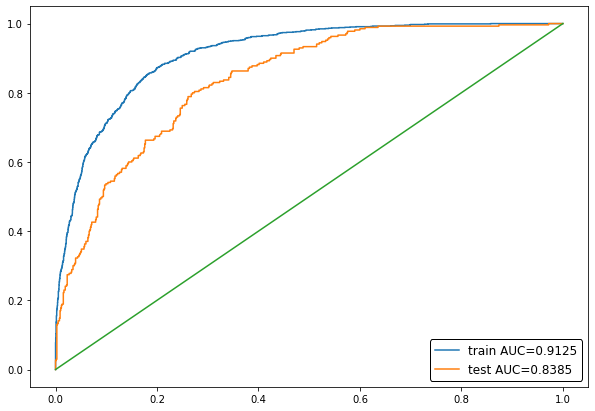

In [23]:
grid_search_boosting_model = catboost.CatBoostClassifier(iterations=1000, learning_rate=0.03, l2_leaf_reg=4, cat_features=cat_cols_indices, eval_metric='AUC')
grid_search_boosting_model.fit(X_train, Y_train, silent=True)
y_train_grid_search_predicted = grid_search_boosting_model.predict_proba(X_train)[:, 1]
y_test_grid_search_predicted = grid_search_boosting_model.predict_proba(X_test)[:, 1]

grid_search_train_auc = roc_auc_score(Y_train, y_train_grid_search_predicted)
grid_search_test_auc = roc_auc_score(Y_test, y_test_grid_search_predicted)
print(grid_search_train_auc, grid_search_test_auc)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(Y_train, y_train_grid_search_predicted)[:2], label='train AUC={:.4f}'.format(grid_search_train_auc))
plt.plot(*roc_curve(Y_test, y_test_grid_search_predicted)[:2], label='test AUC={:.4f}'.format(grid_search_test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [28]:
default_test_auc, grid_search_test_auc

(0.8397499410238264, 0.8385232366124087)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [45]:
best_model = grid_search_boosting_model

In [46]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.